<a href="https://colab.research.google.com/github/braulioalda4-code/nuevo_repositorio/blob/main/Py-4-Braulio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargando datos...
✅ Datos cargados: 8190 filas, 12 columnas

=== INSPECCIÓN INICIAL ===
Primeras 5 filas:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Tipos de datos:
Store 

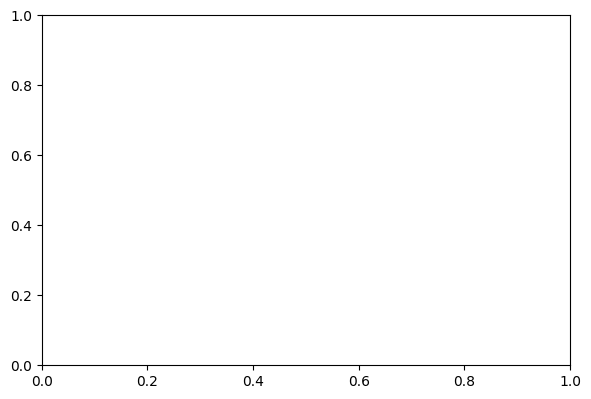

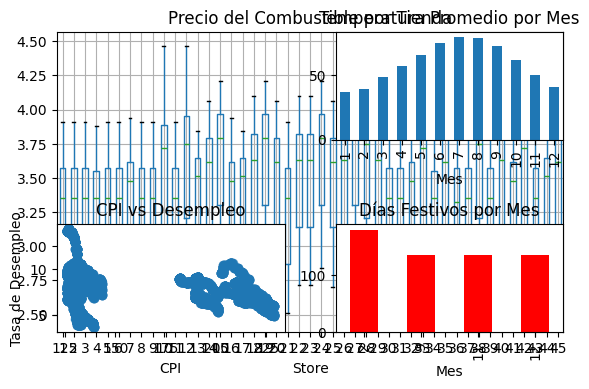


=== ANÁLISIS ADICIONAL ===


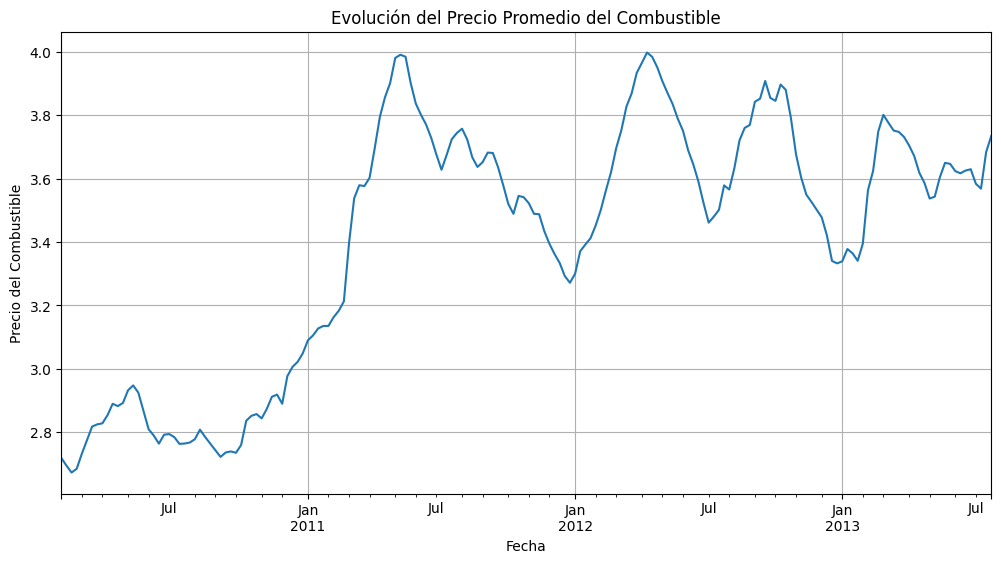


Matriz de correlaciones (numéricas):
              Temperature  Fuel_Price    CPI  Unemployment  MarkDown1  \
Temperature         1.000       0.101  0.164         0.151     -0.125   
Fuel_Price          0.101       1.000 -0.187        -0.033      0.066   
CPI                 0.164      -0.187  1.000        -0.303     -0.044   
Unemployment        0.151      -0.033 -0.303         1.000      0.021   
MarkDown1          -0.125       0.066 -0.044         0.021      1.000   
MarkDown2          -0.322      -0.193 -0.045        -0.002      0.021   
MarkDown3          -0.078      -0.057 -0.020        -0.003     -0.090   
MarkDown4          -0.064      -0.009 -0.054         0.022      0.810   
MarkDown5          -0.003      -0.022  0.002         0.032      0.086   

              MarkDown2  MarkDown3  MarkDown4  MarkDown5  
Temperature      -0.322     -0.078     -0.064     -0.003  
Fuel_Price       -0.193     -0.057     -0.009     -0.022  
CPI              -0.045     -0.020     -0.054      0.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CARGAR DATOS
print("Cargando datos...")
df = pd.read_csv('features.csv')

print(f" Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

# 2. INSPECCIÓN INICIAL
print("\n=== INSPECCIÓN INICIAL ===")
print("Primeras 5 filas:")
print(df.head())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos:")
print(df.isnull().sum())

# 3. LIMPIEZA DE DATOS
print("\n=== LIMPIEZA DE DATOS ===")

# Convertir tipos de datos
df['Date'] = pd.to_datetime(df['Date'])
df['IsHoliday'] = df['IsHoliday'].astype(bool)

# Columnas MarkDown - manejar 'NA' como valores nulos
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Tipos después de la conversión:")
print(df.dtypes)

# 4. ANÁLISIS BÁSICO
print("\n=== ANÁLISIS BÁSICO ===")
print(f"Rango de fechas: {df['Date'].min()} a {df['Date'].max()}")
print(f"Tiendas únicas: {df['Store'].unique()}")
print(f"Total de días festivos: {df['IsHoliday'].sum()}")

# Estadísticas por tienda
print("\nEstadísticas por tienda:")
store_summary = df.groupby('Store').agg({
    'Temperature': ['mean', 'min', 'max'],
    'Fuel_Price': 'mean',
    'CPI': 'mean'
}).round(2)
print(store_summary)

# 5. VISUALIZACIONES SIMPLES
print("\n=== VISUALIZACIONES ===")
plt.figure(figsize=(15, 10))

# Precio del combustible por tienda
plt.subplot(2, 2, 1)
df.boxplot(column='Fuel_Price', by='Store')
plt.title('Precio del Combustible por Tienda')
plt.suptitle('')

# Temperatura promedio por mes
plt.subplot(2, 2, 2)
df['Month'] = df['Date'].dt.month
temp_by_month = df.groupby('Month')['Temperature'].mean()
temp_by_month.plot(kind='bar')
plt.title('Temperatura Promedio por Mes')
plt.xlabel('Mes')

# CPI vs Desempleo
plt.subplot(2, 2, 3)
plt.scatter(df['CPI'], df['Unemployment'], alpha=0.6)
plt.xlabel('CPI')
plt.ylabel('Tasa de Desempleo')
plt.title('CPI vs Desempleo')

# Días festivos por mes
plt.subplot(2, 2, 4)
holidays_by_month = df[df['IsHoliday']].groupby('Month').size()
holidays_by_month.plot(kind='bar', color='red')
plt.title('Días Festivos por Mes')
plt.xlabel('Mes')

plt.tight_layout()
plt.show()

# 6. ANÁLISIS ADICIONAL
print("\n=== ANÁLISIS ADICIONAL ===")

# Evolución temporal del precio del combustible
plt.figure(figsize=(12, 6))
fuel_by_date = df.groupby('Date')['Fuel_Price'].mean()
fuel_by_date.plot()
plt.title('Evolución del Precio Promedio del Combustible')
plt.ylabel('Precio del Combustible')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

# Correlaciones
print("\nMatriz de correlaciones (numéricas):")
numeric_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] + markdown_cols
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(3))

print("\n Procesamiento completado exitosamente!")
print(f"DataFrame final: {df.shape}")